#<font color = darkblue> Análise Exploratória (Qual é o maior motivo dos funcionarios sairem da empresa?)




### Importando bibliotecas para uso

In [ ]:
import pandas as pd
import numpy as np

### Importando arquivo para análise

In [ ]:
#Importando o arquivo xlsx
df = pd.read_excel('Projeto_Individual.xlsx')
#Renomeando as colunas
df = df.rename(columns={'Unnamed: 0':'A','Unnamed: 1':'Causas de saída','Unnamed: 2':'Capacidade de Impactar','Unnamed: 3':'Parceiro RH', 'Unnamed: 4':'Entrevista de saída(ex-funcionario)'})
df

,A,Causas de saída,Capacidade de Impactar,Parceiro RH,Entrevista de saída(ex-funcionario)
0,NaN,NaN,NaN,NaN,NaN
1,NaN,Dados,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Ability to impact,HRBP,Exit survey
4,NaN,Training,11,31,23
5,NaN,Conflict with others,10,11,15
6,NaN,Lack of recognition,9,65,44
7,NaN,Workload,8,14,39
8,NaN,Career advancement,7,137,171
9,NaN,Pay,6,16,24


- Tratando o arquivo para eliminar as linhas e colunas nulas

In [ ]:
#Eliminar a coluna que só tem valores nulos
df = df.drop('A', axis=1)

In [ ]:
#Eliminar as linhas com valores nulos, ou com valores que não vão ser utilizados na nossa análise
df = df.drop([0,1,2,3], axis=0)

In [ ]:
#Traduzindo o nome das linhas
df.at[4,'Causas de saída'] = 'Treinamento'
df.at[5,'Causas de saída'] = 'Conflito com outros'
df.at[6,'Causas de saída'] = 'Falta de reconhecimento'
df.at[7,'Causas de saída'] = 'Carga horária'
df.at[8,'Causas de saída'] = 'Progressão de carreira'
df.at[9,'Causas de saída'] = 'Remuneração'
df.at[10,'Causas de saída'] = 'Tipo de trabalho'
df.at[11,'Causas de saída'] = 'Mudança de carreira'
df.at[12,'Causas de saída'] = 'Trajeto'
df.at[13,'Causas de saída'] = 'Realocação'
df.at[14,'Causas de saída'] = 'Doença'

In [ ]:
df

,Causas de saída,Capacidade de Impactar,Parceiro RH,Entrevista de saída(ex-funcionario)
4,Treinamento,11,31,23
5,Conflito com outros,10,11,15
6,Falta de reconhecimento,9,65,44
7,Carga horária,8,14,39
8,Progressão de carreira,7,137,171
9,Remuneração,6,16,24
10,Tipo de trabalho,5,128,78
11,Mudança de carreira,4,18,30
12,Trajeto,3,31,22
13,Realocação,2,105,37


- Vamos verificar o qual é o tipo de valores no nosso DataFrame, para fazer a conversão se necessário.

In [ ]:
df.dtypes

Causas de saída                        object
Capacidade de Impactar                 object
Parceiro RH                            object
Entrevista de saída(ex-funcionario)    object
dtype: object

- Com todas as colunas do tipo 'object' nós não conseguimos fazer determinadas funções, então precisamos mudar nas colunas e linhas que são números para o tipo 'int

In [ ]:
#Convertendo o tipo de valor das colunas
df['Capacidade de Impactar'] = df['Capacidade de Impactar'].astype(int)
df['Parceiro RH'] = df['Parceiro RH'].astype(int)
df['Entrevista de saída(ex-funcionario)'] = df['Entrevista de saída(ex-funcionario)'].astype(int)

In [ ]:
#Verificando se a conversão foi feita com sucesso
df.dtypes

Causas de saída                        object
Capacidade de Impactar                  int64
Parceiro RH                             int64
Entrevista de saída(ex-funcionario)     int64
dtype: object

###Análise

- Para nossa análise exploratória iremos utilizar o Parceiro RH(HRBP) que é uma empresa ou pessoa qualificada para análisar o fluxo de funcionarios, e a entrevista de saída que são feitas com os funcionarios que estão deixando a empresa

In [ ]:
# Para isso vamos apagar a coluna Capacidade de Impactar
df = df.drop('Capacidade de Impactar', axis=1)

In [ ]:
df

,Causas de saída,Parceiro RH,Entrevista de saída(ex-funcionario)
4,Treinamento,31,23
5,Conflito com outros,11,15
6,Falta de reconhecimento,65,44
7,Carga horária,14,39
8,Progressão de carreira,137,171
9,Remuneração,16,24
10,Tipo de trabalho,128,78
11,Mudança de carreira,18,30
12,Trajeto,31,22
13,Realocação,105,37


- Para verificar qual é o maior causador de saídas, segundo os ex-funcionarios vamos utilizar a função max(), que ela irá identificar o maior valor da coluna e para a nossa análise vai ser o suficiente para verificar o maior causador de saídas nessa primeira parte.

In [ ]:
#Com o comando max, verificamos qual é o maior valor da coluna
mvex = df['Entrevista de saída(ex-funcionario)'].max()

- - O maior causador de saídas segundo os ex-funcionarios seria a progressão de carreira, a oportunidade de crescimento dentro da empresa.

- Agora vamos verificar segundo o Parceiro RH(HRBP) qual é o maior causador de saídas

In [ ]:
mvrh = df['Parceiro RH'].max()

- - Segundo o Parceiro RH, o maior causador de saídas da empresa também é a progressão de carreira

- Vamos analisar agora a porcentagem que representa o motivo progressão de carreira

In [ ]:
# Verificando a porcentagem ex-funcionarios
porcentagem1 = ((df['Entrevista de saída(ex-funcionario)'].max() / df['Entrevista de saída(ex-funcionario)'].sum())*100).round(2)
print(f'A porcentagem de pessoas que sairam da empresa pelo motivo da progressão de carreira é {porcentagem1}%')

A porcentagem de pessoas que sairam da empresa pelo motivo da progressão de carreira é 33.93%


In [ ]:
# Verificando a porcentagem Parcerio RH(HRBP)
porcentagem2 = ((df['Parceiro RH'].max() / df['Parceiro RH'].sum())*100).round(2)
print(f'A porcentagem de pessoas que sairam da empresa pelo motivo da progressão de carreira é {porcentagem2}%')


A porcentagem de pessoas que sairam da empresa pelo motivo da progressão de carreira é 24.25%


- Vamos analisar agora a média dos motivos de saída para verificar se a progressão de carreira fica muito a cima da média

In [ ]:
# Verificando a média ex-funcionarios
media1 = (df['Entrevista de saída(ex-funcionario)'].mean()).round(2)
print(f'Verificando a média segundo os ex-funcionarios {media1} percebemos que o maior motivo de saída fica muito a cima {mvex}')

Verificando a média segundo os ex-funcionarios 45.82 percebemos que o maior motivo de saída fica muito a cima 171


In [ ]:
# Verificando a média Parceiro RH(HRBP)
media2 = (df['Parceiro RH'].mean()).round(2)
print(f'Verificando a média segundo o HRBP {media2} percebemos que o maior motivo de saída fica muito a cima {mvrh}')

Verificando a média segundo o HRBP 51.36 percebemos que o maior motivo de saída fica muito a cima 137


- Para conseguirmos visualizar melhor esses valores discrepantes, podemos utilizar o gráfico boxplot

<Axes: >

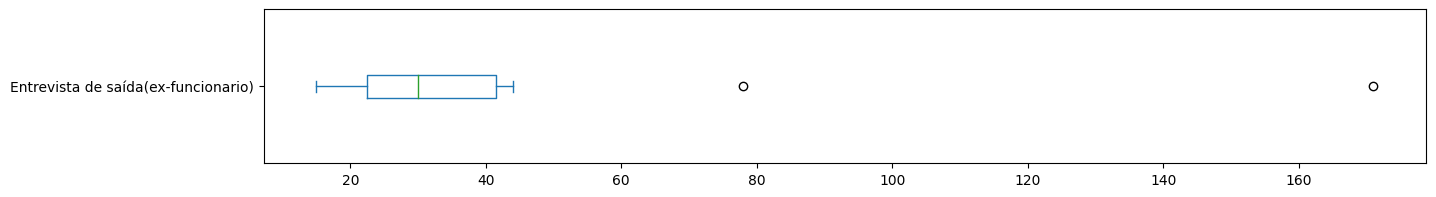

In [ ]:
# Gráfico boxplot ex-funcionarios
df['Entrevista de saída(ex-funcionario)'].plot.box(vert=False, figsize=(15,2))


<Axes: >

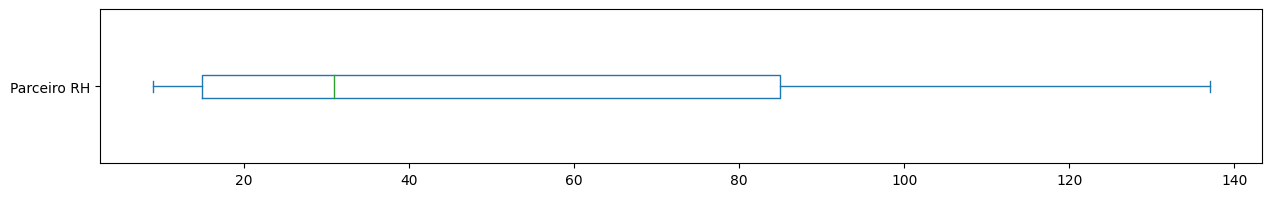

In [ ]:
# Gráfico boxplot Parceiro HH(HRBP)
df['Parceiro RH'].plot.box(vert=False, figsize=(15,2))

- Mesmo na coleta de dados do HRBP tendo outros motivos com valores aproximados da principal causa na qual determinamos ser o maior motivo de saídas da empresa, ele ainda continua sendo o maior motivo, e chego a essa conclusão devido a ele ser dominante na entrevista de saída com ex-funcionarios.

### Conclusão

- <font color = darkblue> Com base na análise exploratória realizada, concluímos que o principal motivo para a saída dos funcionários é a progressão de carreira. Isso indica que os funcionários estão buscando oportunidades de crescimento e desenvolvimento em suas carreiras, e podem não estar encontrando essas oportunidades dentro da empresa. É importante que a empresa avalie suas políticas de progressão de carreira e desenvolvimento profissional para garantir que os funcionários tenham oportunidades de crescimento e se sintam valorizados. Isso pode ajudar a reter talentos e reduzir a rotatividade de funcionários.

### Links para visualização dos gráficos e do dashboard

- Mapa de árvore:
https://public.tableau.com/app/profile/jo.o.vitor.cunha/viz/Mapadervore_16933598841650/Mapadervore


![Mapa de Arvore](https://dc694.4shared.com/img/uK5BV8_dku/s23/18a57c16618/Mapa_de_arvore)


<font color = green>Benefícios:

Visualização Hierárquica: Ótimos para representar hierarquias e estruturas de decisão.

Compreensão Rápida: Facilitam a compreensão rápida de estruturas complexas.

Tomada de Decisão: Úteis para representar árvores de decisão em algoritmos e processos de tomada de decisão.

Identificação de Problemas: Permitem identificar problemas ou desvios rapidamente.

<font color = red>Malefícios:

Limitações para Dados Contínuos: Menos eficazes para dados contínuos ou numéricos.

Espaço Limitado: Podem se tornar densos em árvores complexas, ocupando muito espaço.

Simplificação Excessiva: Às vezes, a simplificação pode resultar na perda de detalhes.

Necessidade de Interpretação: Interpretação pode ser complicada em árvores muito grandes.

Limitações para Grandes Conjuntos de Dados: Podem não ser eficazes para grandes conjuntos de dados com hierarquias profundas.

- Barras duplas:
https://public.tableau.com/app/profile/jo.o.vitor.cunha/viz/GrficodeBarrasLadoaLado/GrficodeBarras

![Barras lado a lado](https://dc694.4shared.com/img/ciyEzKq-ge/s23/18a57c15e48/Barras_lado_a_lado)


<font color = green>Benefícios:

Comparação Direta: Permitem a comparação direta de duas séries de dados lado a lado, facilitando a análise de diferenças e padrões.

Ênfase na Diferença: Destacam as diferenças entre as duas séries, o que é útil para enfatizar contrastes.

Visualização Clara: Oferecem uma representação visual clara e intuitiva, tornando os dados mais compreensíveis.

Uso para Categorias Discretas: São eficazes quando se trabalha com categorias discretas, como produtos, anos ou regiões.

<font color = red>Malefícios:

Complexidade Visual: Quando mal projetados, gráficos de barras duplas podem se tornar visualmente complexos, dificultando a interpretação.

Dificuldade de Comparação Absoluta: Podem dificultar a comparação absoluta de valores entre as séries, especialmente se os eixos não forem devidamente rotulados.

Requer Espaço Horizontal: Normalmente, ocupam mais espaço horizontal do que outros tipos de gráficos, o que pode ser um problema em relatórios com espaço limitado.

Limitado a Duas Séries: São mais adequados para a comparação de duas séries de dados; não são ideais para várias séries.


- Barras horizontais: https://public.tableau.com/app/profile/jo.o.vitor.cunha/viz/GrficodeBarrasHorizontais/GrficodeBarrasDeitadas

![Barras Horizontais](https://dc694.4shared.com/img/zny3A0M-jq/s23/18a57c15a60/Barras_horizontais)


<font color = green>Benefícios:

Comparação Simples: Permitem uma comparação direta entre duas ou mais categorias, tornando fácil identificar diferenças e tendências.

Ênfase na Variação: Destacam as variações entre as categorias, tornando mais simples destacar discrepâncias.

Apresentação Visual Clara: Oferecem uma representação visual clara e intuitiva dos dados, tornando as informações mais acessíveis.

Versatilidade: Podem ser usados para comparar diferentes grupos de dados, como vendas por região ou desempenho de equipes.

<font color = red>Malefícios:

Espaço Horizontal: Requerem espaço horizontal significativo para exibir as categorias lado a lado, o que pode ser um desafio em gráficos com espaço limitado.

Visualmente Complexos: Quando muitas categorias são usadas, os gráficos de barras lado a lado podem se tornar visualmente complexos e difíceis de interpretar.

Limitados para Categorias Discretas: São mais eficazes quando se trabalha com categorias discretas, como produtos ou regiões, e podem não ser ideais para dados contínuos.

Desafio de Legendas: Com um grande número de categorias, pode ser necessário usar legendas, o que pode dificultar a leitura.

- Dashboard com interação no mapa de árvore: https://public.tableau.com/app/profile/jo.o.vitor.cunha/viz/DashboardcominteraonoMapadervore/Dashboard

![Dashboard](https://dc396.4shared.com/img/BMUa_j5xfa/s23/18a57c16230/Dashboard)

<font color = green>Benefícios:

Visualização de Dados Simplificada: Um dashboard oferece uma visão simplificada dos dados, tornando as informações complexas mais compreensíveis.

Tomada de Decisão Rápida: Facilita a tomada de decisão rápida, uma vez que as informações essenciais estão disponíveis em um único local.

Monitoramento em Tempo Real: Permite o monitoramento em tempo real de métricas e KPIs importantes.

Identificação de Tendências: Ajuda na identificação de tendências e padrões nos dados, o que pode ser valioso para análises futuras.

Customização: É altamente personalizável, permitindo que os usuários escolham quais métricas desejam visualizar.

Acessibilidade: Pode ser acessado de qualquer lugar, muitas vezes por meio da nuvem.

Economia de Tempo: Economiza tempo ao centralizar informações e evitar a necessidade de procurar em várias fontes.

Compartilhamento de Informações: Facilita o compartilhamento de informações e colaboração entre equipes.

Melhorias na Produtividade: Ajuda a aumentar a eficiência e produtividade, uma vez que os dados importantes estão prontamente disponíveis.

Suporte à Estratégia de Negócios: Contribui para o alinhamento com metas e estratégias de negócios.

Feedback e Aprendizado: Fornece feedback contínuo e oportunidades de aprendizado com base nos dados.

### Conclusão da visualização dos gráficos

<font color = darkblue>- De acordo com os dados que foram fornecidos para análise o gráfico de barras duplas é a melhor opção, pois permite uma comparação clara e direta entre duas séries de dados, destacando as diferenças e tendências de forma eficaz. Ele fornece uma representação visual intuitiva que facilita a interpretação dos dados e destaca as variações de maneira visualmente impactante. Além disso, sua versatilidade o torna ideal para uma ampla gama de cenários de análise, tornando-o a escolha preferida para apresentar e comunicar informações de maneira eficaz.